# Testing PRM

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from shapely.geometry import Point, Polygon, LineString
from descartes.patch import PolygonPatch

In [2]:
from IPEnvironment import CollisionChecker

In [3]:
simpleField = dict()
simpleField["obs1"] = Polygon([(6, 14), (13, 14), (13, 11), (6,11)]).buffer(2.0)
simpleField["obs2"] = Polygon([(16, 5), (19, 5), (19, 3),(16,3)]).buffer(1.0)

In [4]:
special = dict()
special["base"] = LineString([(11,0),(11,18)]).buffer(0.5)
for i in range(15):
    target1 = (11-0.5*i,18-i)
    target2 = (11+0.5*i,18-i)
    special["partA"+str(i)] = LineString([(11,18-i), target1 ]).buffer(0.2)
    special["partB"+str(i)] = LineString([(11,18-i), target2 ]).buffer(0.2)
    if i % 2 == 0:
        special["candA"+str(i)] = LineString([target1, (target1[0], target1[1]+1.5)]).buffer(0.05)
        special["candB"+str(i)] = LineString([target2, (target2[0], target2[1]+1.5)]).buffer(0.05)

In [5]:
collCheck = CollisionChecker(simpleField)

/opt/homebrew/lib/python3.10/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


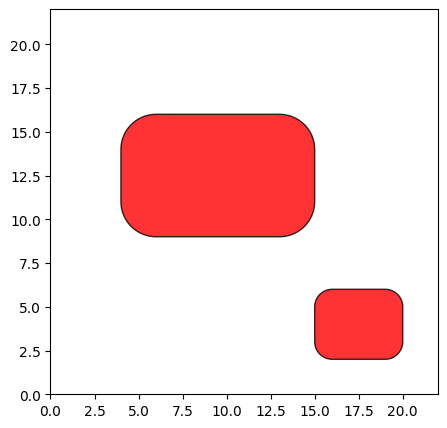

In [6]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

limits = collCheck.getEnvironmentLimits()
ax.set_xlim(limits[0])
ax.set_ylim(limits[1])

collCheck.drawObstacles(ax)


In [7]:
collCheck.pointInCollision([17.5, 3.5])

True

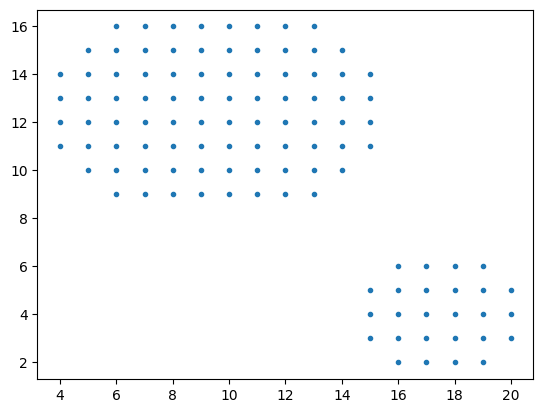

In [8]:
x = []
y = []
scale = 1
for q1 in range(scale * int(limits[0][1])):
    for q2 in range(scale * int(limits[1][1])):
        if collCheck.pointInCollision([q1/scale,q2/scale]):
            x.append(q1/scale)
            y.append(q2/scale)
            
plt.scatter(x,y,marker='.')

In [35]:
import IPBasicPRM

In [36]:
planer = IPBasicPRM.BasicPRM(collCheck)

In [37]:
config = dict()
config["radius"]   = 5.0
config["numNodes"] = 100

In [38]:
solution = planer.planPath([[2,2]],[[16,14]],config)

In [39]:
import IPVISBasicPRM

/opt/homebrew/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


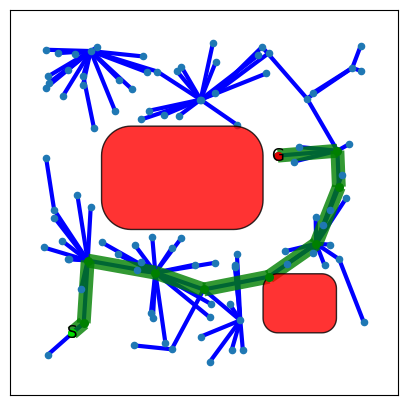

In [40]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
IPVISBasicPRM.basicPRMVisualize(planer, solution, ax, 20)

In [68]:
import IPVisibilityPRM
planer = IPVisibilityPRM.VisPRM(collCheck)
config = dict()
config["ntry"]   = 50

In [69]:
solution = planer.planPath([[2,2]],[[16,14]],config)

In [70]:
import IPVISVisibilityPRM

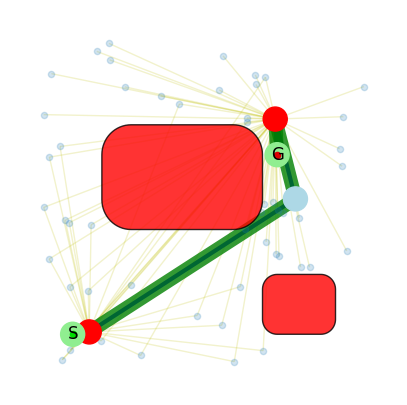

In [71]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
IPVISVisibilityPRM.visibilityPRMVisualize(planer, solution, ax, 20)

In [32]:
import IPLazyPRM
planer = IPLazyPRM.LazyPRM(collCheck)
config = dict()
config["initialRoadmapSize"] = 80 # number of nodes of first roadmap
config["updateRoadmapSize"]  = 1000 # number of nodes to add if there is no connection from start to end
config["kNearest"] = 5 # number of nodes to connect to during setup

In [33]:
solution = planer.planPath([[2,2]],[[16,14]],config)

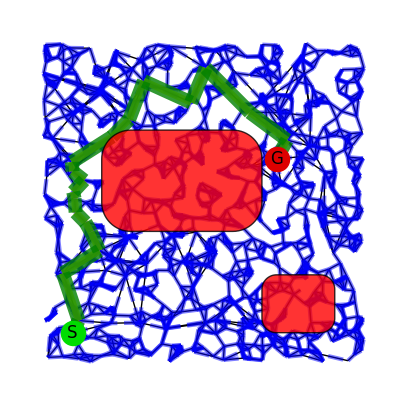

In [34]:
import IPVISLazyPRM
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
IPVISLazyPRM.lazyPRMVisualize(planer, solution, ax, 20)